### Importación de datos



In [25]:
# Importación de librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [27]:
# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)

In [28]:
# Cargar los datos
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [36]:
# Agregar identificador de tienda a cada DataFrame
tienda1['tienda'] = 'Tienda 1'
tienda2['tienda'] = 'Tienda 2'
tienda3['tienda'] = 'Tienda 3'
tienda4['tienda'] = 'Tienda 4'

In [29]:
# Verificar la estructura de los datos
print("Estructura de datos de la Tienda 1:")
print(tienda1.info())
print("\nPrimeras 5 filas de la Tienda 1:")
print(tienda1.head())

Estructura de datos de la Tienda 1:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB
None

Primeras 5 filas de la Tienda 1:
            

In [31]:
# Combinamos todos los datos para análisis comparativo
todas_tiendas = pd.concat([tienda1, tienda2, tienda3, tienda4])

#1. Análisis de facturación



In [32]:
# PARTE 1: ANÁLISIS DE FACTURACIÓN
print("\n===== PARTE 1: ANÁLISIS DE FACTURACIÓN =====")


===== PARTE 1: ANÁLISIS DE FACTURACIÓN =====



Facturación total por tienda:
     Tienda  Facturación Total
0  Tienda 1       1.150880e+09
1  Tienda 2       1.116344e+09
2  Tienda 3       1.098020e+09
3  Tienda 4       1.038376e+09


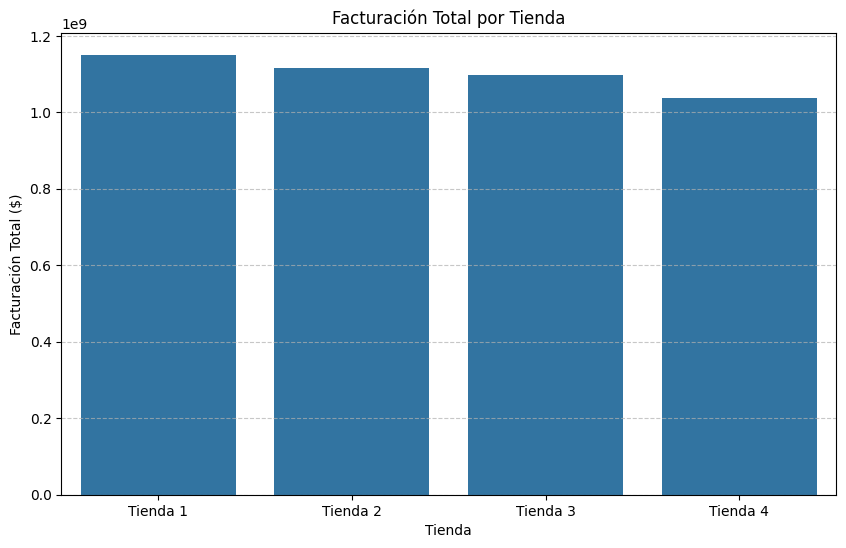

In [38]:
# Verificar el nombre exacto de la columna de precio
# Asumimos que la columna se llama "Precio" con P mayúscula en lugar de "precio"
if 'Precio' in todas_tiendas.columns:
    columna_precio = 'Precio'
elif 'precio' in todas_tiendas.columns:
    columna_precio = 'precio'

# Si encontramos la columna de precio, procedemos con el análisis
if columna_precio:
    # Calcular facturación total por tienda
    facturacion_tienda = todas_tiendas.groupby('tienda')[columna_precio].sum().reset_index()
    facturacion_tienda.columns = ['Tienda', 'Facturación Total']
    print("\nFacturación total por tienda:")
    print(facturacion_tienda)

    # Visualización: Gráfico de barras para la facturación
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Tienda', y='Facturación Total', data=facturacion_tienda)
    plt.title('Facturación Total por Tienda')
    plt.xlabel('Tienda')
    plt.ylabel('Facturación Total ($)')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.savefig('facturacion_tienda.png')
    plt.show()
else:
    print("No se pudo identificar la columna de precio. Revise los datos.")

# 2. Ventas por categoría

In [39]:
# PARTE 2: VENTAS POR CATEGORÍA
print("\n===== PARTE 2: VENTAS POR CATEGORÍA =====")


===== PARTE 2: VENTAS POR CATEGORÍA =====


In [40]:
# Verificar el nombre exacto de la columna de categoría
if 'Categoría' in todas_tiendas.columns:
    columna_categoria = 'Categoría'
elif 'categoría' in todas_tiendas.columns:
    columna_categoria = 'categoría'
elif 'Categoria' in todas_tiendas.columns:
    columna_categoria = 'Categoria'
elif 'categoria' in todas_tiendas.columns:
    columna_categoria = 'categoria'
else:
    # Listar todas las columnas para identificar la columna de categoría
    print("Buscando columna de categoría...")
    posibles_columnas_categoria = [col for col in todas_tiendas.columns if 'categ' in col.lower() or 'tipo' in col.lower()]
    print("Posibles columnas de categoría:", posibles_columnas_categoria)
    columna_categoria = posibles_columnas_categoria[0] if posibles_columnas_categoria else None

Buscando columna de categoría...
Posibles columnas de categoría: ['Categoría del Producto']


In [41]:
if columna_categoria:
    # Calcular ventas por categoría para cada tienda
    categoria_ventas = todas_tiendas.groupby(['tienda', columna_categoria]).size().reset_index(name='Cantidad')
    print("\nVentas por categoría para cada tienda:")
    for tienda in ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']:
        ventas_tienda = categoria_ventas[categoria_ventas['tienda'] == tienda].sort_values('Cantidad', ascending=False)
        print(f"\n{tienda}:")
        print(ventas_tienda)


Ventas por categoría para cada tienda:

Tienda 1:
     tienda   Categoría del Producto  Cantidad
7  Tienda 1                  Muebles       465
3  Tienda 1             Electrónicos       448
5  Tienda 1                 Juguetes       324
2  Tienda 1        Electrodomésticos       312
1  Tienda 1     Deportes y diversión       284
4  Tienda 1   Instrumentos musicales       182
6  Tienda 1                   Libros       173
0  Tienda 1  Artículos para el hogar       171

Tienda 2:
      tienda   Categoría del Producto  Cantidad
15  Tienda 2                  Muebles       442
11  Tienda 2             Electrónicos       422
13  Tienda 2                 Juguetes       313
10  Tienda 2        Electrodomésticos       305
9   Tienda 2     Deportes y diversión       275
12  Tienda 2   Instrumentos musicales       224
14  Tienda 2                   Libros       197
8   Tienda 2  Artículos para el hogar       181

Tienda 3:
      tienda   Categoría del Producto  Cantidad
23  Tienda 3            

In [44]:
# Visualización: Gráficos de pastel para categorías por tienda
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()

    for i, tienda in enumerate(['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']):
        data = categoria_ventas[categoria_ventas['tienda'] == tienda]
        axes[i].pie(data['Cantidad'], labels=data[columna_categoria], autopct='%1.1f%%', startangle=90)
        axes[i].set_title(f'Distribución de Categorías en {tienda}')

    plt.tight_layout()
    plt.savefig('categorias_por_tienda.png')
    plt.show()
else:
    print("No se pudo identificar la columna de categoría. Revise los datos.")

IndentationError: unexpected indent (<ipython-input-44-7c676b77b17e>, line 2)

# 3. Calificación promedio de la tienda


# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda